In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw=pd.read_excel(r'C:\Users\lenovo\Downloads\Analytics Assignment.xlsx',sheet_name='Data',
                     parse_dates=['eventTimestamp'])

In [3]:
df_raw.head()

,eventTimestamp,userID,sessionID,platform,userCountry,realCurrencyAmount,realCurrencyAmount.1,realCurrencyType
0,2019-11-01 00:36:27.111,16707,NaN,ANDROID,NaN,1998,19.98,AUD
1,2019-11-01 01:37:04.019,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,US,499,4.99,USD
2,2019-11-01 01:37:46.025,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,US,499,4.99,USD
3,2019-11-01 02:16:25.076,101530,NaN,ANDROID,NaN,1249,12.49,USD
4,2019-11-01 02:58:06.726,102640,6fe2173d-923b-4590-b1a3-797904672d11,ANDROID,US,499,4.99,USD


In [4]:
df_raw.isnull().sum()

eventTimestamp             0
userID                     0
sessionID                138
platform                   0
userCountry              138
realCurrencyAmount         0
realCurrencyAmount.1       0
realCurrencyType        2000
dtype: int64

In [5]:
g = df_raw.dropna(subset=['userCountry']).drop_duplicates('realCurrencyType').set_index('realCurrencyType')['userCountry']
df_raw['userCountry'] = df_raw['userCountry'].fillna(df_raw['realCurrencyType'].map(g))

m = df_raw.dropna(subset=['realCurrencyType']).drop_duplicates('userCountry').set_index('userCountry')['realCurrencyType']
df_raw['realCurrencyType'] = df_raw['realCurrencyType'].fillna(df_raw['userCountry'].map(m))

k = df_raw.dropna(subset=['sessionID']).drop_duplicates('userID').set_index('userID')['sessionID']
df_raw['sessionID'] = df_raw['sessionID'].fillna(df_raw['userID'].map(k))

In [6]:
df_raw.isnull().sum()

eventTimestamp           0
userID                   0
sessionID               81
platform                 0
userCountry              4
realCurrencyAmount       0
realCurrencyAmount.1     0
realCurrencyType        39
dtype: int64

In [7]:
df_final=df_raw.dropna()

In [8]:
df_final.head()

,eventTimestamp,userID,sessionID,platform,userCountry,realCurrencyAmount,realCurrencyAmount.1,realCurrencyType
1,2019-11-01 01:37:04.019,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,US,499,4.99,USD
2,2019-11-01 01:37:46.025,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,US,499,4.99,USD
4,2019-11-01 02:58:06.726,102640,6fe2173d-923b-4590-b1a3-797904672d11,ANDROID,US,499,4.99,USD
5,2019-11-01 03:40:29.622,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,DK,4200,42.00,DKK
6,2019-11-01 03:57:00.998,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,DK,8500,85.00,DKK


In [9]:
df_final.drop(['realCurrencyAmount'],axis=1,inplace=True)
df_final=df_final.rename(columns={'realCurrencyAmount.1':'realCurrencyAmount'})

In [10]:
b = {'AUD':0.69, 'USD':1, 'DKK':0.15, 'CAD':0.76, 'CHF':1.02, 'EUR':1.11, 
     'GBP':1.33, 'SEK':0.11, 'RUB':0.016,'NOK':0.11, 'BRL':0.24, 'NZD':0.66, 'JPY':0.0091}
df_final['conversion_usd'] = df_final.realCurrencyType.map(b)
df_final['realCurrencyamount'] = df_final['realCurrencyAmount'] * df_final['conversion_usd']
df_final.drop(['realCurrencyAmount','conversion_usd','realCurrencyType','userCountry'],axis=1,inplace=True)

In [11]:
df_final.shape

(2880, 5)

In [12]:
df_final.head()

,eventTimestamp,userID,sessionID,platform,realCurrencyamount
1,2019-11-01 01:37:04.019,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,4.99
2,2019-11-01 01:37:46.025,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,4.99
4,2019-11-01 02:58:06.726,102640,6fe2173d-923b-4590-b1a3-797904672d11,ANDROID,4.99
5,2019-11-01 03:40:29.622,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,6.30
6,2019-11-01 03:57:00.998,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,12.75


In [13]:
df_final.dtypes

eventTimestamp        datetime64[ns]
userID                         int64
sessionID                     object
platform                      object
realCurrencyamount           float64
dtype: object

In [14]:
df_final.head()

,eventTimestamp,userID,sessionID,platform,realCurrencyamount
1,2019-11-01 01:37:04.019,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,4.99
2,2019-11-01 01:37:46.025,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,4.99
4,2019-11-01 02:58:06.726,102640,6fe2173d-923b-4590-b1a3-797904672d11,ANDROID,4.99
5,2019-11-01 03:40:29.622,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,6.30
6,2019-11-01 03:57:00.998,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,12.75


In [15]:
df_final['Login_Date'] = df_final['eventTimestamp'].dt.date

In [16]:
df_final['Sessions']=df_final['sessionID'].map(df_final.sessionID.value_counts())

In [17]:
df_final.head()

,eventTimestamp,userID,sessionID,platform,realCurrencyamount,Login_Date,Sessions
1,2019-11-01 01:37:04.019,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,4.99,2019-11-01,2
2,2019-11-01 01:37:46.025,25142,c13fd09a-cce2-419f-9f1e-533258c19d61,ANDROID,4.99,2019-11-01,2
4,2019-11-01 02:58:06.726,102640,6fe2173d-923b-4590-b1a3-797904672d11,ANDROID,4.99,2019-11-01,1
5,2019-11-01 03:40:29.622,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,6.30,2019-11-01,2
6,2019-11-01 03:57:00.998,102632,8767274a-1aa0-4892-afa9-a78537a9eb6c,ANDROID,12.75,2019-11-01,2


In [18]:
#Total users in the game
Android_users=len(df_final[df_final['platform']=='ANDROID'].userID.value_counts())
Ios_users=len(df_final[df_final['platform']=='IOS'].userID.value_counts())
Both_platform=len(df_final.userID.value_counts())
Android_users , Ios_users , Both_platform

(286, 157, 443)

In [49]:
#Average Sessions Per User
Android_users=df_final[df_final['platform']=='ANDROID'].dropna(subset=['Sessions']).drop_duplicates('userID').set_index('userID')['Sessions'].sum()
Ios_users=df_final[df_final['platform']=='IOS'].dropna(subset=['Sessions']).drop_duplicates('userID').set_index('userID')['Sessions'].sum()
Both_platform=df_final.dropna(subset=['Sessions']).drop_duplicates('userID').set_index('userID')['Sessions'].sum()
Android_users/286 , Ios_users/157 , Both_platform/443

(1.9125874125874125, 2.3630573248407645, 2.072234762979684)

In [20]:
#Maximum revenue earned by a user (Andoid)
df_final[df_final['platform']=='ANDROID'].groupby('userID', 
as_index=False).sum().sort_values(['realCurrencyamount'],ascending=False).iloc[:1]

,userID,realCurrencyamount,Sessions
117,104340,549.78,64


In [21]:
#Maximum revenue earned by a user (Ios)
df_final[df_final['platform']=='IOS'].groupby('userID', 
as_index=False).sum().sort_values(['realCurrencyamount'],ascending=False).iloc[:1]

,userID,realCurrencyamount,Sessions
37,105744,255.15,35


In [22]:
#ARPDAU(Average Revenue Per Daily Active User)
df_final.pivot_table('realCurrencyamount','userID','Login_Date',aggfunc='mean').mean()

Login_Date
2019-11-01    10.547204
2019-11-02     7.691704
2019-11-03     7.526865
2019-11-04     8.670327
2019-11-05     9.182542
2019-11-06     8.234968
2019-11-07     7.822949
2019-11-08     9.695145
2019-11-09     8.973476
2019-11-10     9.474611
2019-11-11    10.727767
2019-11-12     8.581247
2019-11-13     9.031914
2019-11-14     9.294653
2019-11-15     8.736048
2019-11-16    10.698827
2019-11-17    12.750894
2019-11-18    11.151356
2019-11-19     8.727012
2019-11-20     9.420680
2019-11-21    10.948627
2019-11-22     3.303643
2019-11-23     5.190766
2019-11-24     5.835477
2019-11-25     4.649870
2019-11-26     5.727598
2019-11-27     7.679836
2019-11-28     7.158389
2019-11-29     9.805186
2019-11-30     8.270471
dtype: float64

In [23]:
#Daily Active Users
df_active=df_final[['userID','platform']]
df_active['Date']=df_raw['eventTimestamp'].dt.day
df_active['Active']=np.where(df_active['Date']>0,1,0)
df_active.drop(['Date'],axis=1,inplace=True)

In [24]:
df_active[df_active['platform']=='ANDROID'].groupby('userID', as_index=False).sum().sort_values(['Active'],ascending=False).iloc[:5]

,userID,Active
239,110014,206
245,110257,89
243,110234,51
250,110333,45
251,110359,32


In [25]:
df_active[df_active['platform']=='IOS'].groupby('userID', as_index=False).sum().sort_values(['Active'],ascending=False).iloc[:5]

,userID,Active
1,20057,328
99,110210,210
88,110062,202
104,110256,119
115,110705,102


In [52]:
#np.count_nonzero(pd.crosstab(df_final.userID,df_final.Login_Date),axis=1)

In [65]:
#Finding Retention
df_ret=df_final[['userID','Sessions']]
df_ret['LoginDate']=df_final['eventTimestamp'].dt.date

df_ret.head()

,userID,Sessions,LoginDate
1,25142,2,2019-11-01
2,25142,2,2019-11-01
4,102640,1,2019-11-01
5,102632,2,2019-11-01
6,102632,2,2019-11-01


In [66]:
group = df_ret.groupby(['LoginDate', 'Sessions'])
cohort_data = group['userID'].size()
cohort_data = cohort_data.reset_index()
cohort_data

,LoginDate,Sessions,userID
0,2019-11-01,1,21
1,2019-11-01,2,19
2,2019-11-01,3,5
3,2019-11-01,4,7
4,2019-11-01,5,5
...,...,...,...
209,2019-11-30,1,38
210,2019-11-30,2,11
211,2019-11-30,4,4
212,2019-11-30,6,12


In [73]:
cohort_counts = cohort_data.pivot(index='LoginDate', columns='Sessions', values='userID')
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)
retention=cohort_counts.divide(base,axis=0).round(3)

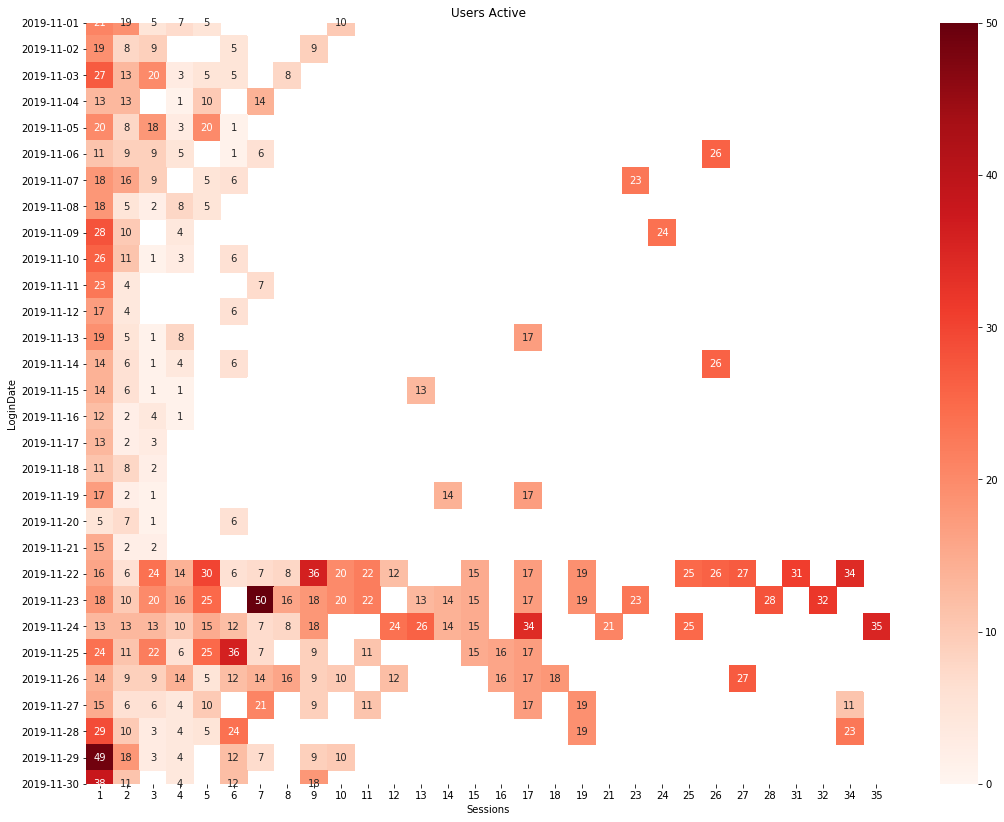

In [74]:
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")
plt.show()